In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import json

In [5]:
# Load CSVs
day_0_trades = pd.read_csv("../prosperity-3-backtester/prosperity3bt/resources/round5/trades_round_5_day_2.csv", delimiter=";")
day_1_trades = pd.read_csv("../prosperity-3-backtester/prosperity3bt/resources/round5/trades_round_5_day_3.csv", delimiter=";")
day_2_trades = pd.read_csv("../prosperity-3-backtester/prosperity3bt/resources/round5/trades_round_5_day_4.csv", delimiter=";")

day_0_prices = pd.read_csv("../prosperity-3-backtester/prosperity3bt/resources/round5/prices_round_5_day_2.csv", delimiter=";")
day_1_prices = pd.read_csv("../prosperity-3-backtester/prosperity3bt/resources/round5/prices_round_5_day_3.csv", delimiter=";")
day_2_prices = pd.read_csv("../prosperity-3-backtester/prosperity3bt/resources/round5/prices_round_5_day_4.csv", delimiter=";")

day_0_prices.head

<bound method NDFrame.head of         day  timestamp                     product  bid_price_1  bid_volume_1  \
0         2          0              PICNIC_BASKET2      30094.0          11.0   
1         2          0  VOLCANIC_ROCK_VOUCHER_9750        469.0          11.0   
2         2          0            RAINFOREST_RESIN       9992.0          35.0   
3         2          0  VOLCANIC_ROCK_VOUCHER_9500        718.0          11.0   
4         2          0               VOLCANIC_ROCK      10218.0         150.0   
...     ...        ...                         ...          ...           ...   
149995    2     999900  VOLCANIC_ROCK_VOUCHER_9750        417.0          20.0   
149996    2     999900              PICNIC_BASKET1      58422.0           1.0   
149997    2     999900                  CROISSANTS       4241.0         143.0   
149998    2     999900        MAGNIFICENT_MACARONS        665.0          18.0   
149999    2     999900  VOLCANIC_ROCK_VOUCHER_9500        666.0          20.0  

In [6]:
day_trades = {
    0: day_0_trades,
    1: day_1_trades,
    2: day_2_trades
}

day_prices = {
    0: day_0_prices,
    1: day_1_prices,
    2: day_2_prices
}
day = 2

In [8]:
df = day_trades[day][day_trades[day]["symbol"] == "SQUID_INK"]

print("Unique participants in the market")

print("Buyers: ", df["buyer"].unique())
print("Sellers: ", df["seller"].unique())

Unique participants in the market
Buyers:  ['Charlie' 'Paris' 'Penelope' 'Gary' 'Pablo' 'Caesar' 'Camilla' 'Gina'
 'Olivia']
Sellers:  ['Paris' 'Caesar' 'Camilla' 'Penelope' 'Charlie' 'Pablo' 'Gary' 'Gina'
 'Olivia']


In [13]:
buyer_info = {}
for buyer in df["buyer"].unique():
    buyer_trades = df[df['buyer'] == buyer]
    sellers_series = sorted(buyer_trades["seller"].value_counts())

    buyer_info[buyer] = {
        "frequency": len(buyer_trades),
        "sellers": sellers_series
    }

seller_info = {}
for seller in df["seller"].unique():
    buyer_trades = df[df['seller'] == seller]
    biggest_buyer = buyer_trades["buyer"].value_counts()
    biggest_buyer = {biggest_buyer.idxmax(): int(biggest_buyer.max())}
    seller_info[seller] = {
        "frequency": len(df[df['seller'] == seller]),
        "sells_to": biggest_buyer
    }

print("Buyers: ", json.dumps(buyer_info))
print("")
print("Sellers: ", json.dumps(seller_info))

Buyers:  {"Charlie": {"frequency": 1244, "buys_from": {"Paris": 745}}, "Paris": {"frequency": 832, "buys_from": {"Charlie": 527}}, "Penelope": {"frequency": 157, "buys_from": {"Charlie": 125}}, "Gary": {"frequency": 109, "buys_from": {"Charlie": 71}}, "Pablo": {"frequency": 97, "buys_from": {"Paris": 33}}, "Caesar": {"frequency": 124, "buys_from": {"Paris": 70}}, "Camilla": {"frequency": 277, "buys_from": {"Paris": 187}}, "Gina": {"frequency": 35, "buys_from": {"Camilla": 12}}, "Olivia": {"frequency": 1, "buys_from": {"Charlie": 1}}}

Sellers:  {"Paris": {"frequency": 1072, "sells_to": {"Charlie": 745}}, "Caesar": {"frequency": 163, "sells_to": {"Charlie": 91}}, "Camilla": {"frequency": 287, "sells_to": {"Paris": 186}}, "Penelope": {"frequency": 154, "sells_to": {"Charlie": 107}}, "Charlie": {"frequency": 762, "sells_to": {"Paris": 527}}, "Pablo": {"frequency": 239, "sells_to": {"Charlie": 146}}, "Gary": {"frequency": 94, "sells_to": {"Charlie": 68}}, "Gina": {"frequency": 104, "sells_

## Notes

* Caesar and Paris are big players in this market on both sides
* Camilla a big player on sell side
* Camilla seems to only sell --> short position
* Only time she bought was w/ Paris NOT Caesar
* Caesar buys everyone else's offers
* Caesar has more buys than sells --> long position

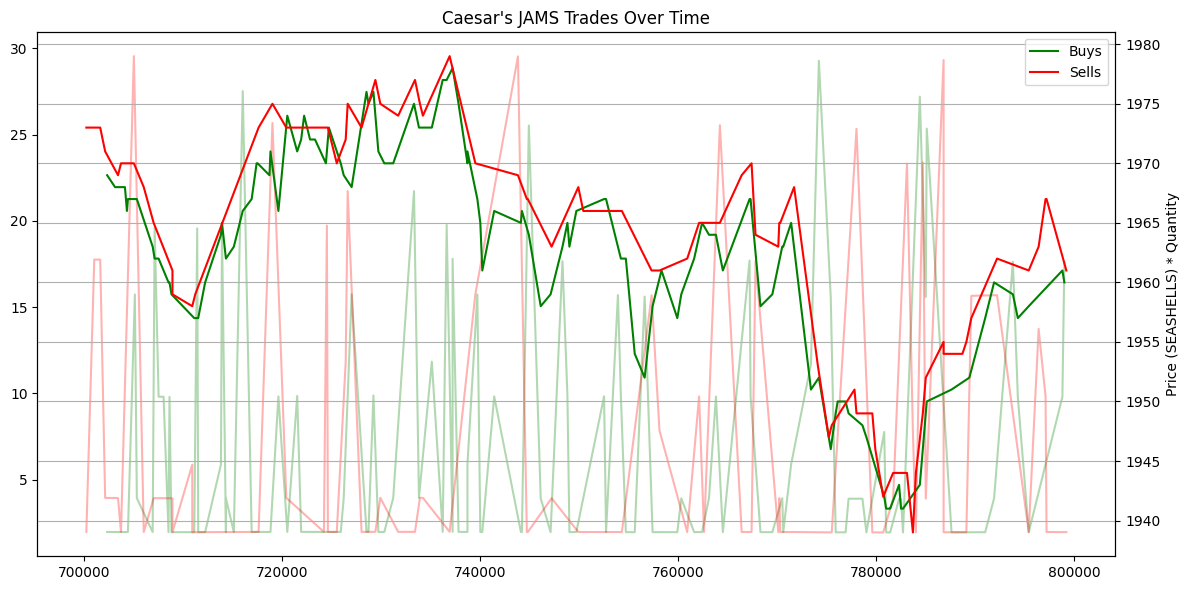

In [12]:
# Lets examine someones (SQUID INK)
df = day_trades[day][day_trades[day]["symbol"] == "SQUID_INK"]

df_buys = df[(df['buyer'] == 'Charlie')]
df_sells = df[(df['seller'] == 'Charlie')]

df_buys = df_buys[(df_buys['timestamp'] >= 700000) & (df_buys['timestamp'] <= 800000)]
df_sells = df_sells[(df_sells['timestamp'] >= 700000) & (df_sells['timestamp'] <= 800000)]

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Caesar's buys in green
ax1.plot(df_buys["timestamp"], df_buys["price"] * df_buys["quantity"] /1000, 
            color='green', label='Buys', alpha=0.3)

# Plot Caesar's sells in red
ax1.plot(df_sells["timestamp"], df_sells["price"] * df_sells["quantity"] / 1000, 
            color='red', label='Sells', alpha=0.3)

ax2 = ax1.twinx()

# Plot Caesar's buys in green
ax2.plot(df_buys["timestamp"], df_buys["price"], 
            color='green', label='Buys', alpha=1)

# Plot Caesar's sells in red
ax2.plot(df_sells["timestamp"], df_sells["price"], 
            color='red', label='Sells', alpha=1)

plt.xlabel("Timestamp")
plt.ylabel("Price (SEASHELLS) * Quantity")
plt.title("Caesar's JAMS Trades Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Notes

* Caesar's trades seem to have a constant vwap despite varying prices
* Seems to be generally bullish

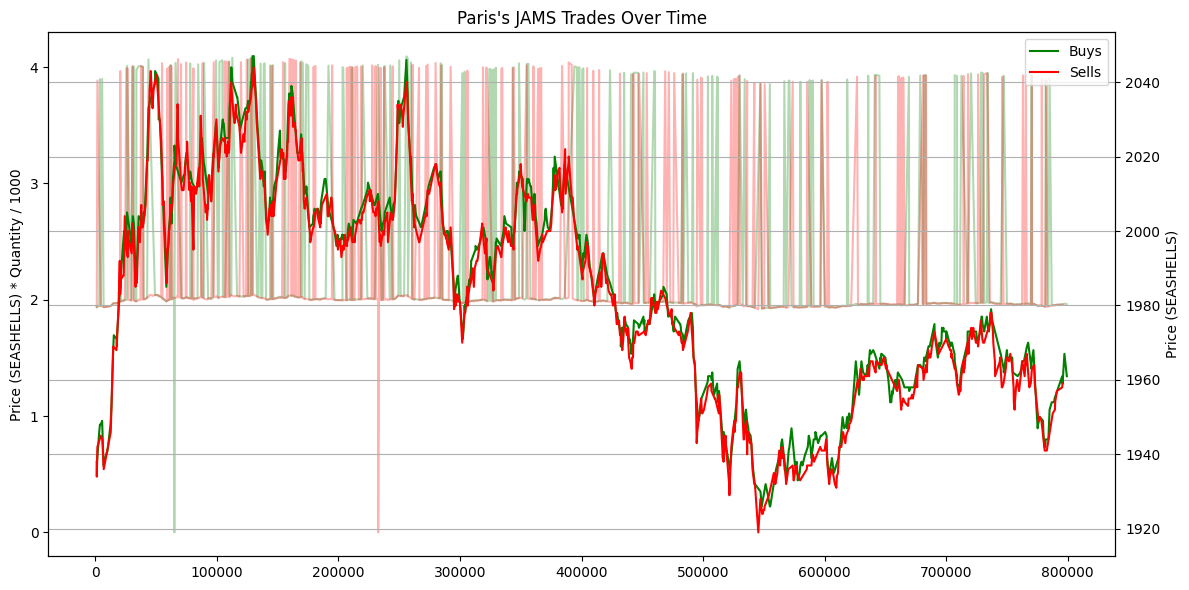

In [14]:
# Lets examine Paris (JAMS)
df = day_trades[day][day_trades[day]["symbol"] == "SQUID_INK"]

df_paris_buys = df[(df['buyer'] == 'Paris')]
df_paris_sells = df[(df['seller'] == 'Paris')]

df_paris_buys = df_paris_buys[(df_paris_buys['timestamp'] >= 000000) & (df_paris_buys['timestamp'] <= 800000)]
df_paris_sells = df_paris_sells[(df_paris_sells['timestamp'] >= 000000) & (df_paris_sells['timestamp'] <= 800000)]

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot paris's buys in green
ax1.plot(df_paris_buys["timestamp"], df_paris_buys["price"] * df_paris_buys["quantity"] /1000, 
            color='green', label='Buys', alpha=0.3)

# Plot paris's sells in red
ax1.plot(df_paris_sells["timestamp"], df_paris_sells["price"] * df_paris_sells["quantity"] / 1000, 
            color='red', label='Sells', alpha=0.3)
ax1.set_ylabel("Price (SEASHELLS) * Quantity / 1000")


ax2 = ax1.twinx()

# Plot paris's buys in green
ax2.plot(df_paris_buys["timestamp"], df_paris_buys["price"], 
            color='green', label='Buys', alpha=1)

# Plot paris's sells in red
ax2.plot(df_paris_sells["timestamp"], df_paris_sells["price"], 
            color='red', label='Sells', alpha=1)
ax2.set_ylabel("Price (SEASHELLS)")

plt.xlabel("Timestamp")
plt.title("Paris's JAMS Trades Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Notes

* Paris's trades seem to be even more consistent when it comes to vwap
* Seems to be market neutral...

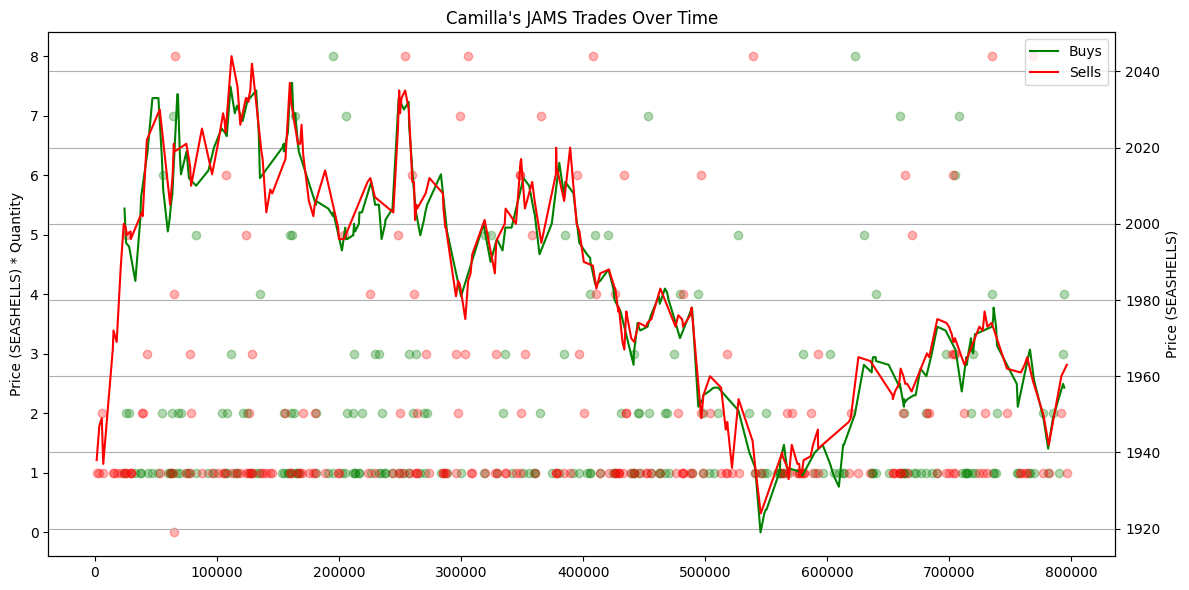

In [21]:
# Lets examine Camilla (JAMS)
df_camilla_buys = df[(df['buyer'] == 'Camilla')]
df_camilla_sells = df[(df['seller'] == 'Camilla')]

df_camilla_buys = df_camilla_buys[(df_camilla_buys['timestamp'] >= 000000) & (df_camilla_buys['timestamp'] <= 800000)]
df_camilla_sells = df_camilla_sells[(df_camilla_sells['timestamp'] >= 000000) & (df_camilla_sells['timestamp'] <= 800000)]

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot camilla's buys in green
ax1.scatter(df_camilla_buys["timestamp"], df_camilla_buys["quantity"] , 
            color='green', label='Buys', alpha=0.3)

# Plot camilla's sells in red
ax1.scatter(df_camilla_sells["timestamp"], df_camilla_sells["quantity"], 
            color='red', label='Sells', alpha=0.3 )
ax1.set_ylabel("Price (SEASHELLS) * Quantity")


ax2 = ax1.twinx()

# Plot camilla's buys in green
ax2.plot(df_camilla_buys["timestamp"], df_camilla_buys["price"], 
            color='green', label='Buys', alpha=1)

# Plot camilla's sells in red
ax2.plot(df_camilla_sells["timestamp"], df_camilla_sells["price"], 
            color='red', label='Sells', alpha=1)
ax2.set_ylabel("Price (SEASHELLS)")

plt.xlabel("Timestamp")
plt.title("Camilla's JAMS Trades Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()